(1, 4, 1500)


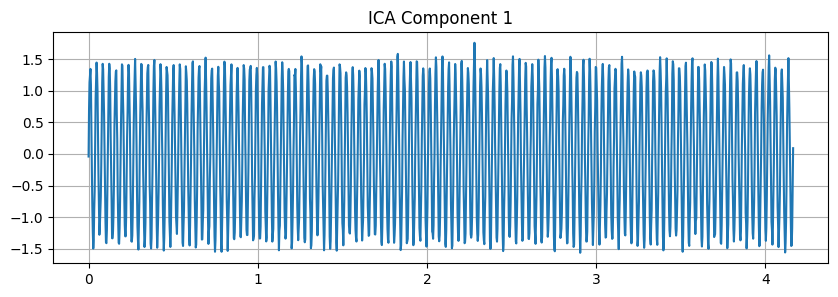

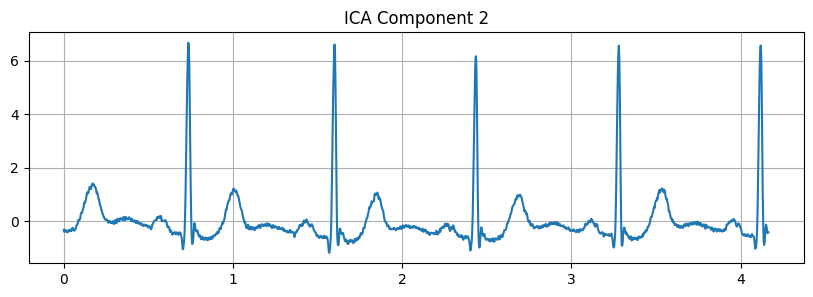

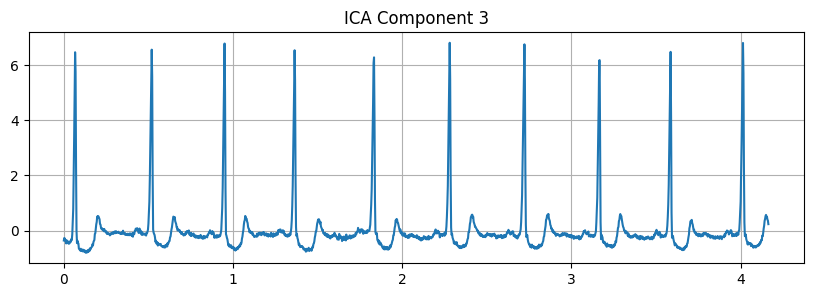

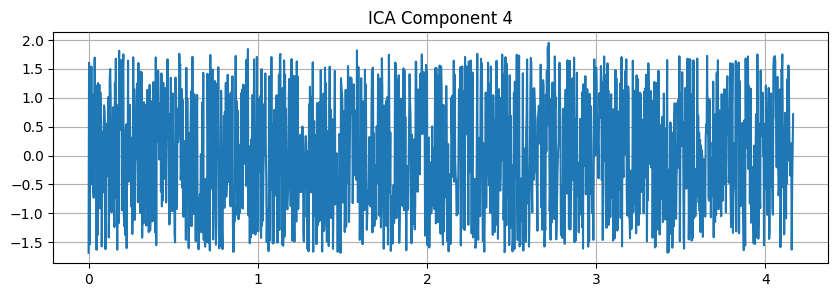

In [29]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

# Load data
data = loadmat('heartbeat_data/000.mat')
print(data['val'].shape)  # Expecting shape (1, 4, 1500) as per description
sr = 360  # Sampling rate for synthetic data

# Reshape data for ICA - we need a (n_samples, n_channels) shape
data_matrix = np.array([data['val'][0][i] for i in range(4)])  # shape (4, n_samples)
data_matrix = data_matrix.T  # Transpose to (n_samples, n_channels)

# Apply ICA
ica = FastICA(n_components=4)
components = ica.fit_transform(data_matrix)  # Shape will be (n_samples, n_components)

# Plot the ICA components
for i in range(4):
    plt.figure(figsize=(10, 3))
    component = components[:, i]
    plt.plot(np.arange(0, len(component) / sr, 1 / sr), component)
    plt.title(f"ICA Component {i+1}")
    plt.grid()
plt.show()
